In [34]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt

Data preprocessing, split into training and testing sets

In [35]:
data = pd.read_csv('SVMtrain.csv')

# Get rid of unique identifier column
data = data.drop('PassengerId', axis=1)

# One-hot encoding for 'Sex' column
encoded = pd.get_dummies(data, columns=['Sex'])

# Split into training and testing data
train = encoded.sample(frac=0.8, random_state=200)
test = encoded.drop(train.index)

# Separate features (x) from target variables (y)
train_x, train_y = train.drop('Survived', axis=1), train['Survived']
test_x, test_y = train.drop('Survived', axis=1), train['Survived']

Define the model

In [36]:
train_x, train_y = train_x.astype(float), train_y.astype(float)
test_x, test_y = test_x.astype(float), test_y.astype(float)

train_x_tensor = torch.tensor(train_x.values, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y.values, dtype=torch.float32)
test_x_tensor = torch.tensor(test_x.values, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y.values, dtype=torch.float32)

input_size = train_x_tensor.shape[1]

train_y_tensor = train_y_tensor.unsqueeze(1)
print(train_y_tensor.size())

# Define the model
model = nn.Sequential(
    nn.Linear(input_size, 1),
    nn.Sigmoid()
)

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

torch.Size([711, 1])


Train the model

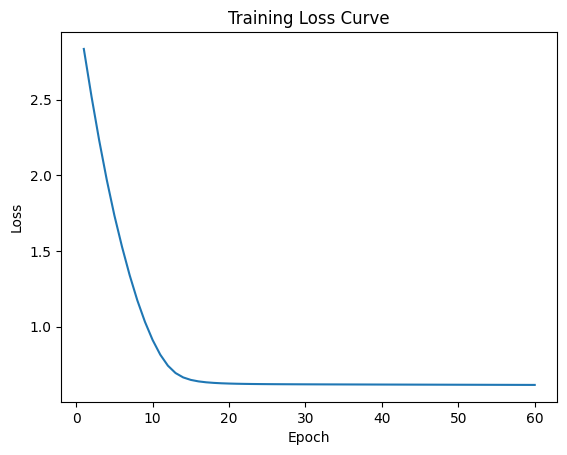

In [37]:
loss_values = []

for epoch in range(60):
    optimizer.zero_grad()
    outputs = model(train_x_tensor)

    loss = loss_function(outputs, train_y_tensor)
    loss_values.append(loss.item())
    loss.backward()
    optimizer.step()

    #print(f"Epoch {epoch+1}/{10}, Loss: {loss.item():.4f}")

# Graph the loss
plt.plot(range(1, len(loss_values) + 1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()